In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def genGauss(n=100,loc=np.array([0,0]), scale=np.array([1,1])):
    dim = loc.shape[0]
    X = np.random.normal(loc=loc, scale=scale, size=(n,dim))
    return X

In [3]:
def genGaussMix(n=100, p=np.array([.5,.5]), loc=np.array([[-2,0],[2,0]]), scale=np.array([[1,1],[1,1]])):
    k = loc.shape[0]
    lstX = []
    for i in range(k):
        samples = int(round(p[i]*n))
        X = genGauss(n=samples, loc=loc[i,:], scale=scale[i,:])
        Y = np.empty((samples,1))
        Y.fill(i+1)
        lstX.append(np.concatenate((X,Y), axis=1))
    return np.concatenate(lstX, axis=0)

In [4]:
def plotGaussMix(X):
    k = np.max(X[:,-1])
    plt.figure(figsize=(10,7))
    for i in range(int(k)):
        data = X[X[:,-1] == i+1]
        plt.scatter(data[:,0], data[:,1], label=f'Cluster {i+1}')
    plt.legend()
    plt.show()

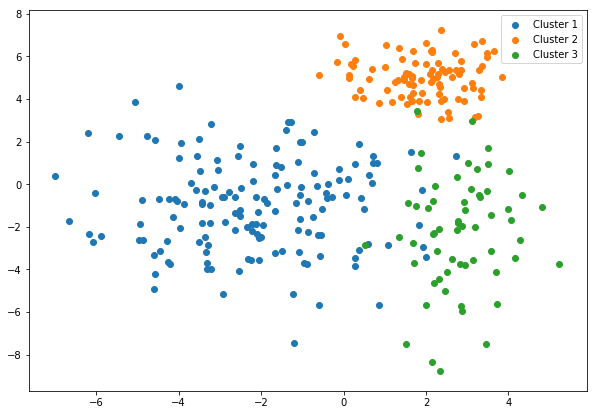

In [6]:
n = 300
p = np.array([.5,.3,.2])
loc = np.array([[-2,-1],[2,5],[3,-2]])
scale = np.array([[2,2],[1,1],[1,3]])
X = genGaussMix(n=n,p=p,loc=loc,scale=scale)
plotGaussMix(X)